In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data=pd.read_csv('E:\d wala\DATA SCIENCE\PROJECT\langauge identification\Language Detection.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12128\3858904067.py:1: SyntaxWarning: invalid escape sequence '\d'
  data=pd.read_csv('E:\d wala\DATA SCIENCE\PROJECT\langauge identification\Language Detection.csv')


In [4]:
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [5]:
data.shape

(10337, 2)

In [6]:
data['Language'].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Language'>

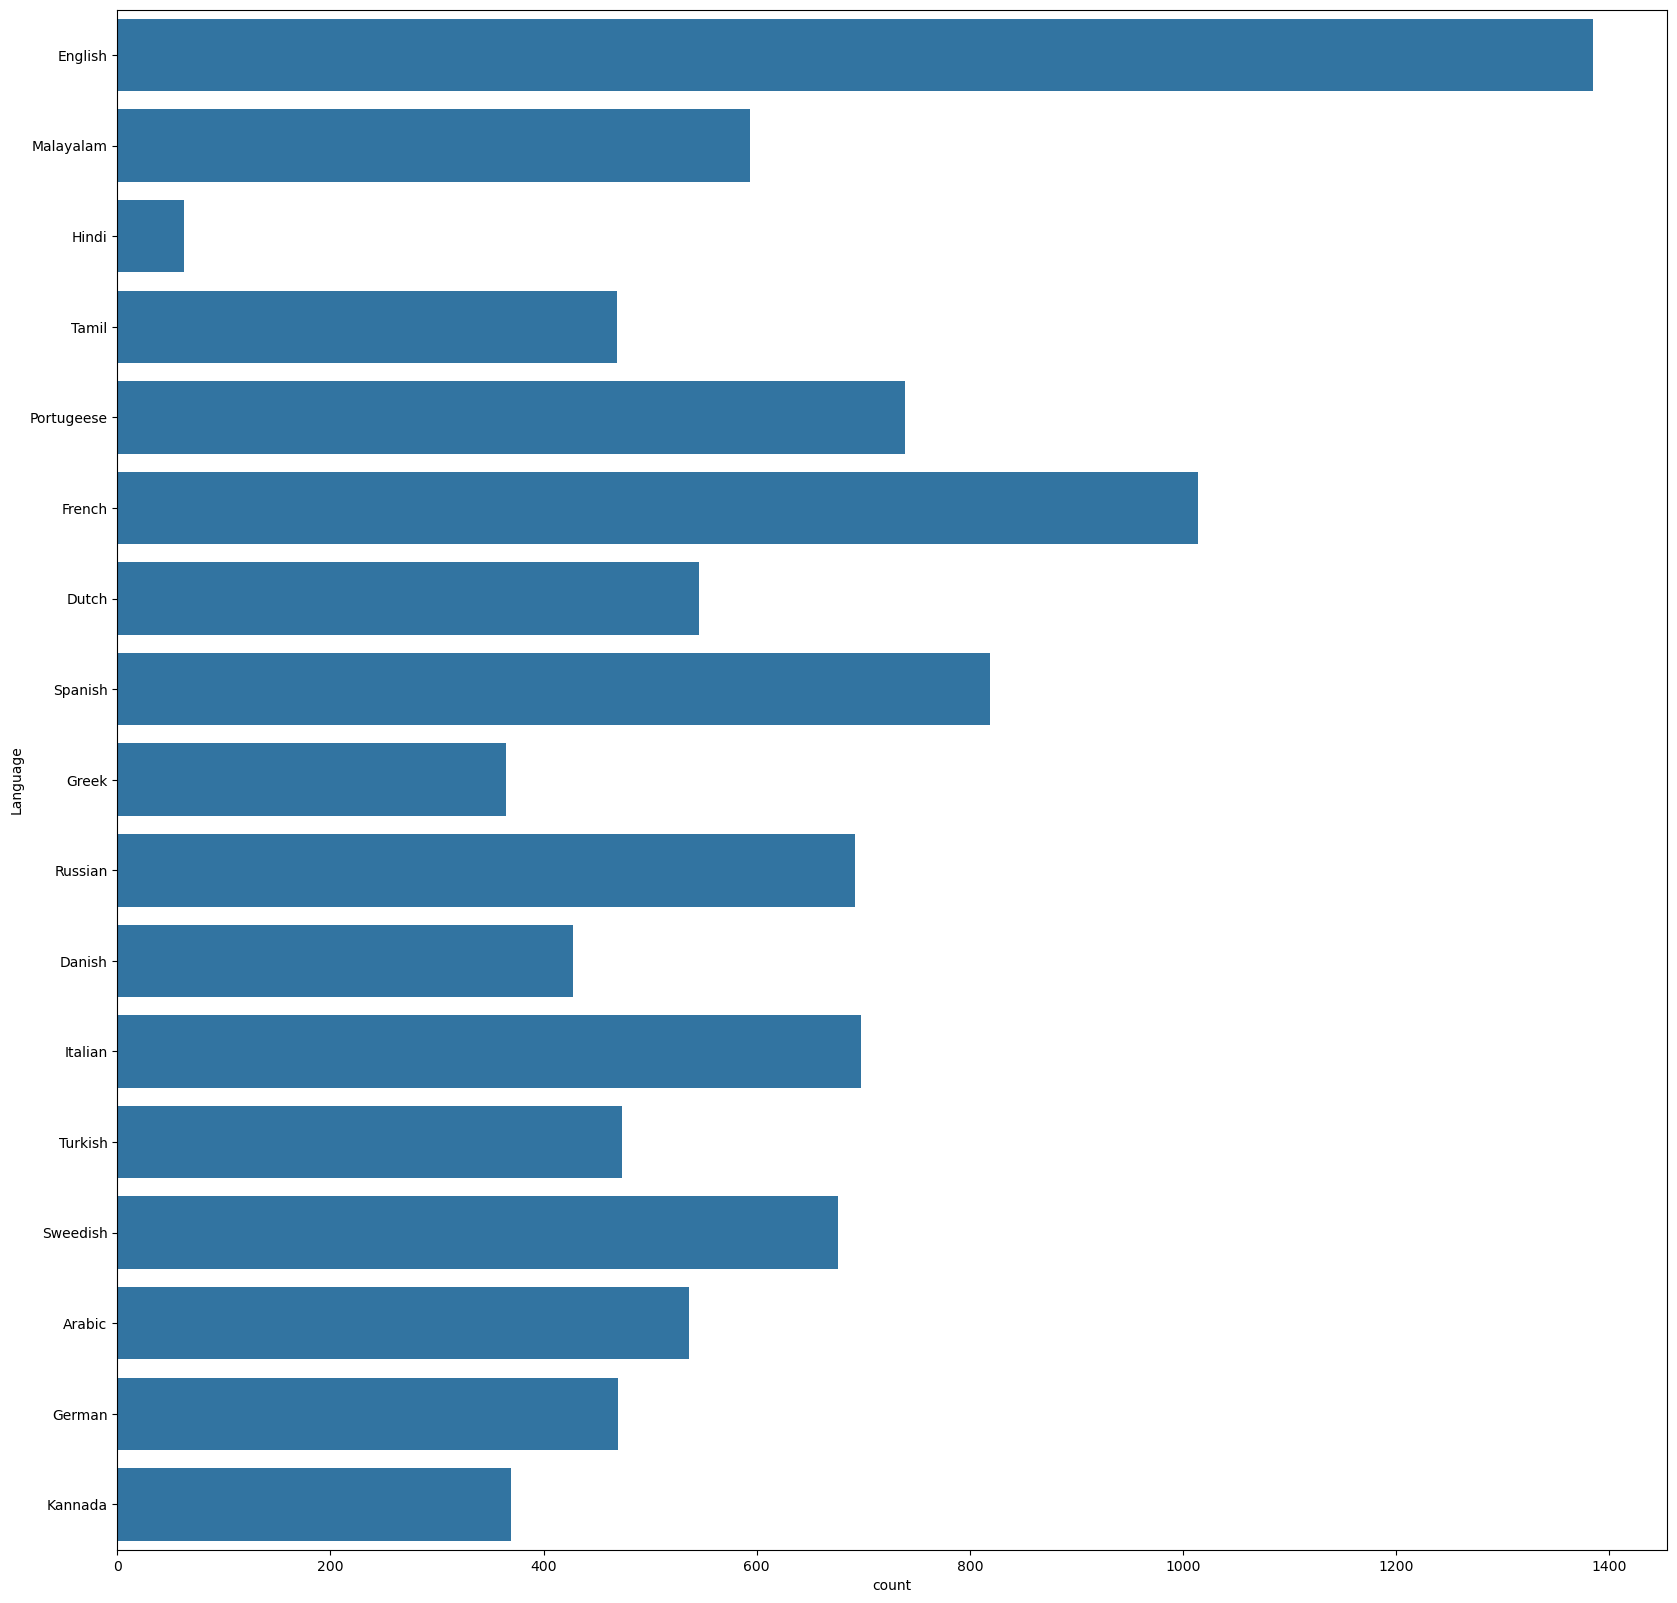

In [7]:
plt.figure(figsize=(20,20))
sns.countplot(data['Language'])

In [8]:
data['Text'][3]

'Although humans are part of nature, human activity is often understood as a separate category from other natural phenomena.'

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [11]:
ps = PorterStemmer()
corpus=[]

for i in range(len(data['Text'])):
    rev= re.sub("^[a-zA-A]",'',data['Text'][i])
    rev=rev.lower()
    rev=rev.split()
    rev = [ps.stem(word) for word in rev if word not in set(stopwords.words())]

    rev=' '.join(rev)
    corpus.append(rev)

    print(f"{i}")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=10000)
X = cv.fit_transform(corpus)  # fit_transform returns a sparse matrix
X= X.toarray() 

In [27]:
X.shape

(10337, 10000)

In [16]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
y=label.fit_transform(data['Language'])

In [18]:
from sklearn.preprocessing import LabelEncoder

# Correct the column name
y = label.fit_transform(data['Language'])
print(data.columns)


Index(['Text', 'Language'], dtype='object')


In [19]:
y

array([3, 3, 3, ..., 9, 9, 9])

In [20]:
len(y)
label.classes_

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

In [21]:
data1=pd.DataFrame(np.c_[corpus,y],columns=['Sentence','Langauage'])

In [22]:
data1

,Sentence,Langauage
0,"nature, broadest sense, natural, physical, mat...",3
1,"""nature"" refer phenomena physic world, life ge...",3
2,"studi natur large, only, part science.",3
3,"lthough human part nature, human activ underst...",3
4,[1] word natur borrow french natur deriv latin...,3
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,9
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,9
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,9
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,9


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8269, 10000), (2068, 10000), (8269,), (2068,))

In [31]:
from sklearn.naive_bayes import MultinomialNB


classifier = MultinomialNB()


classifier.fit(X_train, y_train)


MultinomialNB()

In [32]:
pred = classifier.predict(X_test)
pred
y_test


array([13, 16, 12, ...,  3, 13,  5])

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))


0.9240812379110251
[[107   0   0  10   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  63   0  10   0   1   0   0   0   0   0   0   0   0   3   0   0]
 [  0   2  93   7   0   0   0   0   0   0   0   1   0   0   3   0   0]
 [  0   2   0 255   1   0   0   0   1   0   0   0   0   1   0   0   0]
 [  0   0   1   4 189   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   3   9   1  88   0   0   0   0   0   0   0   0   3   0   1]
 [  0   0   0   6   0   0  64   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18   0   0   0   0   0   0   0   0   0]
 [  0   0   0   9   1   0   0   0 141   0   0   1   0   0   0   0   0]
 [  0   0   0   5   0   0   0   0   0  72   0   0   0   0   0   0   0]
 [  0   0   0   3   0   0   0   0   0   0 111   0   0   0   0   0   0]
 [  0   0   0   5   1   0   0   0   4   0   0 136   0   4   0   0   0]
 [  0   0   0   9   0   0   0   0   0   0   0   0 133   0   0   0   0]
 [  0   0   0  11   0   0   0   0   0   0   0   2   0 145 

<Axes: >

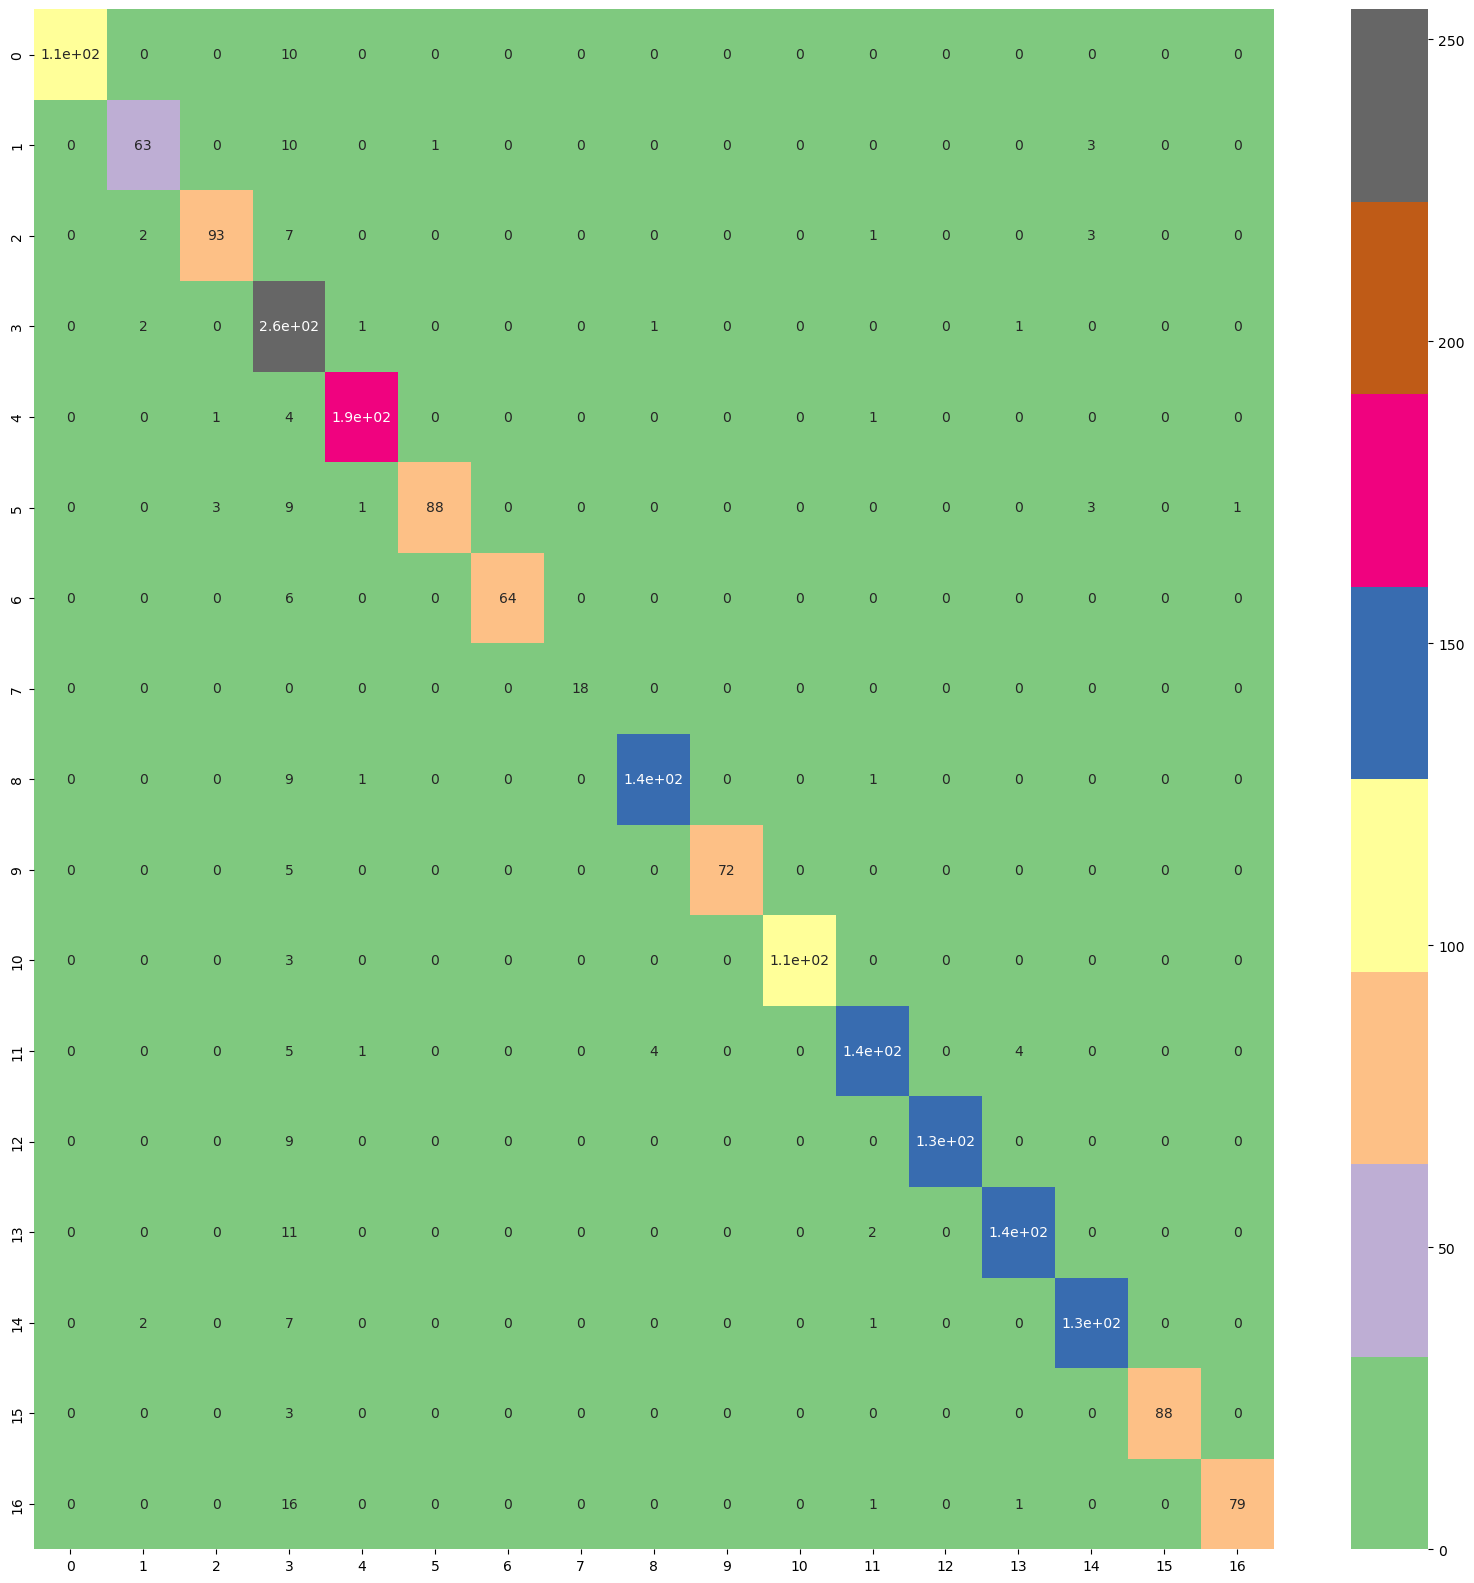

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test,pred),annot=True, cmap=plt.cm.Accent)

In [38]:
fn1=pd.DataFrame(np.c_[y_test,pred],columns=['Actual','predicted'])
fn1

,Actual,predicted
0,13,13
1,16,16
2,12,12
3,3,3
4,3,3
...,...,...
2063,12,12
2064,15,15
2065,3,3
2066,13,13


In [39]:
import joblib
joblib.dump(classifier, 'Langauge_identification.sav')

['Langauge_identification.sav']

In [41]:
model=joblib.load('E:\d wala\DATA SCIENCE\PROJECT\langauge identification\Langauge_identification.sav')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12128\2091290723.py:1: SyntaxWarning: invalid escape sequence '\d'
  model=joblib.load('E:\d wala\DATA SCIENCE\PROJECT\langauge identification\Langauge_identification.sav')


In [46]:
def test_model(test_sentence):
    langauges={
        'Arabic': 0,
        'Danish': 1, 
        'Dutch' : 2, 
        'English' : 3, 
        'French' : 4, 
        'German' : 5,
       'Greek' : 6, 
       'Hindi' : 7, 
        'Italian' : 8, 
        'Kannada' : 9, 
        'Malayalam' : 10, 
        'Portugeese' : 11,
       'Russian' : 12, 
       'Spanish' : 13, 
       'Sweedish' : 14, 
       'Tamil' : 15, 
       'Turkish' : 16   
    }

    rev= re.sub("^[a-zA-A]",' ',test_sentence)
    rev=rev.lower()
    rev=rev.split()
    rev = [ps.stem(word) for word in rev if word not in set(stopwords.words())]

    rev=' '.join(rev)
    rev= cv.transform([rev]).toarray()

    output=model.predict(rev)[0]

    keys=list(langauges)
    values=list(langauges.values())
    position=values.index(output)

    output=keys[position]
    print(output)


In [47]:
test_model('ഒരുവീട്ടമ്മ അന്നുകണ്ട സിനിമ ആരുണ്ടാക്കി, അഭിനയിക്കുന്നവരാരെല്ലാം എന്നെഴുതുന്നു.')

Malayalam


In [51]:
 pd.DataFrame(np.c_[data['Text'], data['Language'], y], columns=['Sentence', 'Language', 'Encoded'])

,Sentence,Language,Encoded
0,"Nature, in the broadest sense, is the natural...",English,3
1,"""Nature"" can refer to the phenomena of the phy...",English,3
2,"The study of nature is a large, if not the onl...",English,3
3,"Although humans are part of nature, human acti...",English,3
4,[1] The word nature is borrowed from the Old F...,English,3
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,9
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,9
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,9
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,9
